Name: Kernel Prieto

This notebook was created using Colab

In [ ]:
import scipy
print( ' scipy: %s ' % scipy.__version__)
# numpy
import numpy
print( ' numpy: %s ' % numpy.__version__)
# matplotlib
import matplotlib
print( ' matplotlib: %s ' % matplotlib.__version__)
# pandas
import pandas
print( ' pandas: %s ' % pandas.__version__)
# statsmodels
import statsmodels
print( ' statsmodels: %s ' % statsmodels.__version__)
# scikit-learn
import sklearn
print( ' sklearn: %s ' % sklearn.__version__)

 scipy: 1.4.1 
 numpy: 1.19.5 
 matplotlib: 3.2.2 
 pandas: 1.1.5 
 statsmodels: 0.10.2 
 sklearn: 1.0.1 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
df = pd.read_csv("pump_failure.csv")
df

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836
...,...,...
22690,2014-02-19 15:05:00,98.185415
22691,2014-02-19 15:10:00,97.804168
22692,2014-02-19 15:15:00,97.135468
22693,2014-02-19 15:20:00,98.056852


##Cleaning data and visualization

In [ ]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [ ]:
df[df["timestamp"].duplicated(keep=False)]

,timestamp,value
10137,2014-01-07 02:00:00,94.423406
10138,2014-01-07 02:05:00,94.698730
10139,2014-01-07 02:10:00,95.332824
10140,2014-01-07 02:15:00,95.079199
10141,2014-01-07 02:20:00,94.881208
10142,2014-01-07 02:25:00,94.563961
10143,2014-01-07 02:30:00,93.430922
10144,2014-01-07 02:35:00,93.729663
10145,2014-01-07 02:40:00,93.192987
10146,2014-01-07 02:45:00,93.967871


There exist duplicated rows, thus I will delete the replicate.

In [ ]:
df0 = pd.read_csv("pump_failure.csv")
df=df0.drop(df0.index[10137:10149])
df.shape[0]

22683

I check if there is missing measurements

In [ ]:
temp=pd.date_range('2013-12-02 21:15:00','2014-02-19 15:25:00',freq='5T')
temp.shape[0]

22683

Since the above values are equal, I conclude there is no missing data.

I saved the clean data into a file named "pump_failure1.csv" for easy use

In [ ]:
df.to_csv('pump_failure1.csv',index=False)

In [ ]:
df = pd.read_csv('pump_failure1.csv', index_col=0)

Visualization of the data

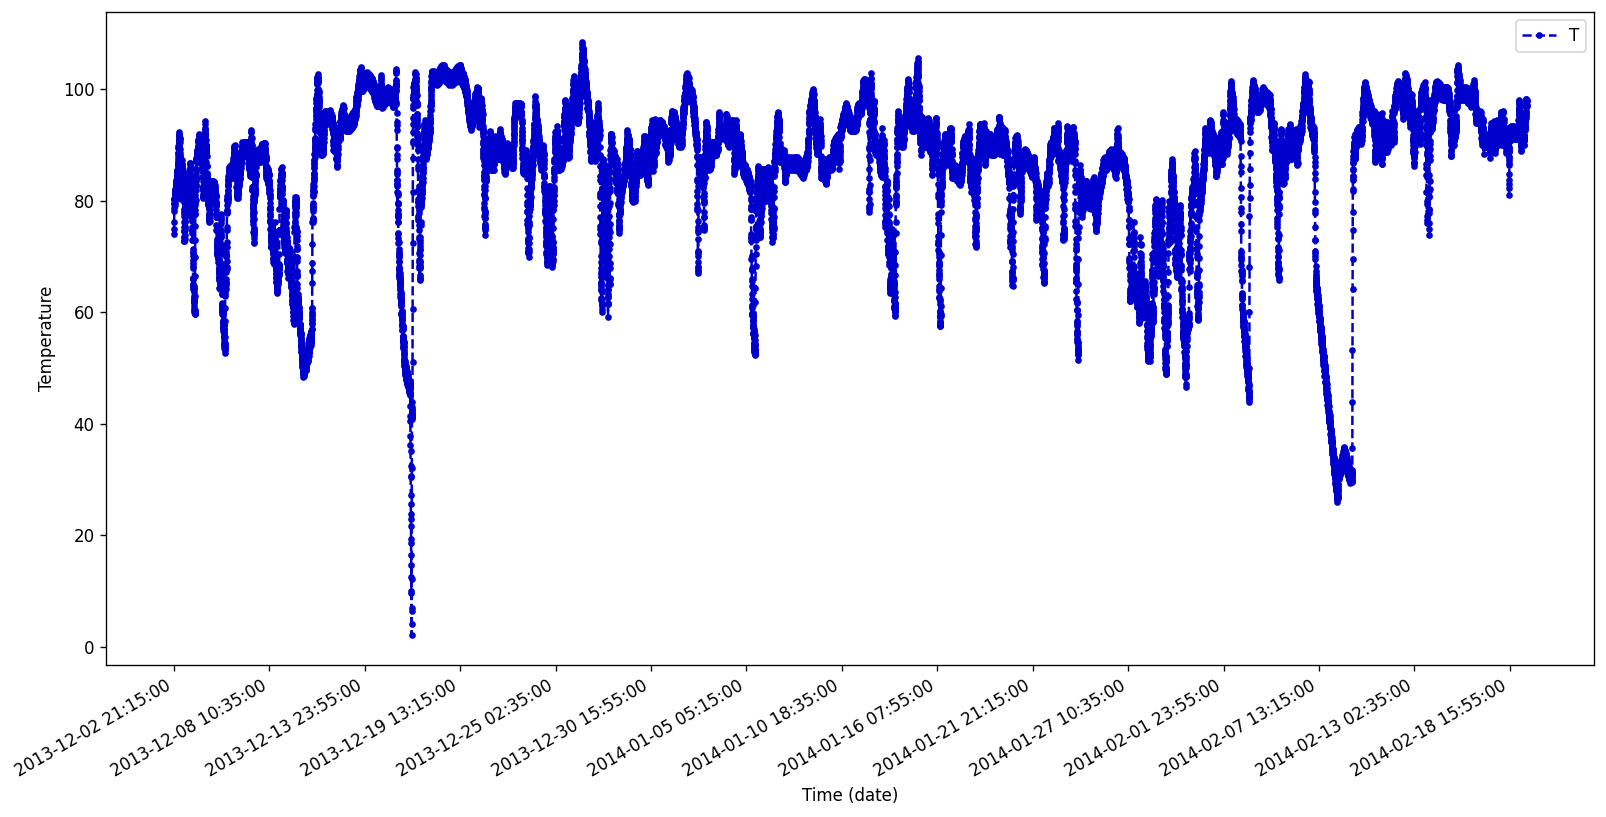

In [ ]:
import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(1600)

fig, ax= plt.subplots(figsize=(16, 8),dpi=120)

ax.plot(df.index,df['value'],linestyle='dashed',marker='.', 
        color='mediumblue')
ax.set_xlabel('Time (date)')  # Add an x-label to the axes.
ax.set_ylabel('Temperature')
#ax.legend(loc="upper right")  # Add a legend.
ax.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

## Time Series Analysis

I load the data as a series

In [ ]:
# load data
#series = pd.read_csv('pump_failure1.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
series = pd.read_csv('pump_failure1.csv', header = 0, parse_dates = ['timestamp'],index_col = ['timestamp'])

In [ ]:
series

,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836
...,...
2014-02-19 15:05:00,98.185415
2014-02-19 15:10:00,97.804168
2014-02-19 15:15:00,97.135468


In [ ]:
plt.rcParams["figure.figsize"] = [14,8]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f051acaa910>]],
      dtype=object)

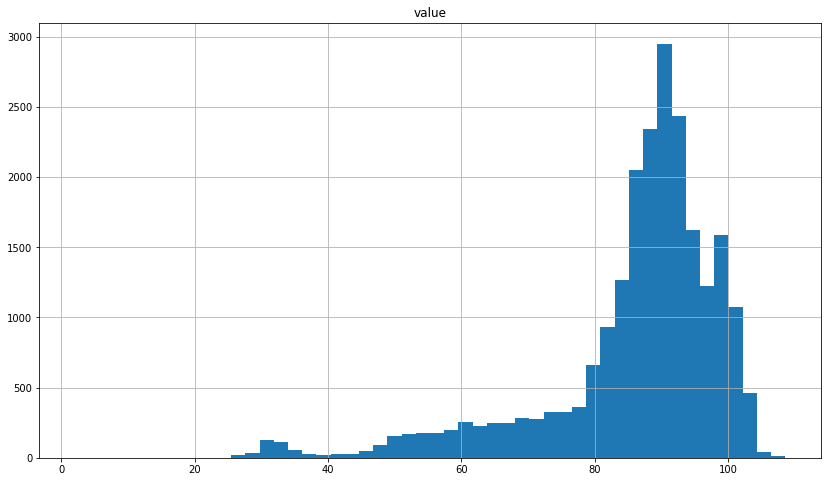

In [ ]:
series.hist(bins=50)

In the above figure we can observe that the data is a negative skewed distribution. Mostly of the outliers will be on the left of the mean. 

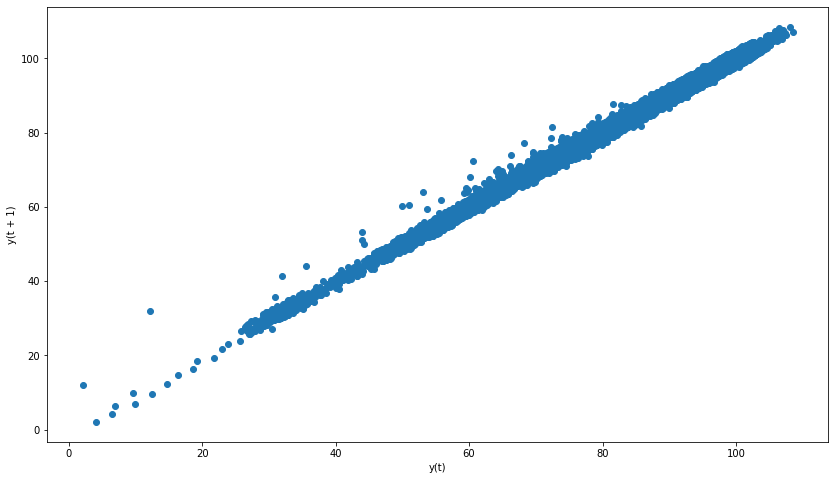

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams["figure.figsize"] = [14,8]
plt.figure()
lag_plot(series)

Boxplots

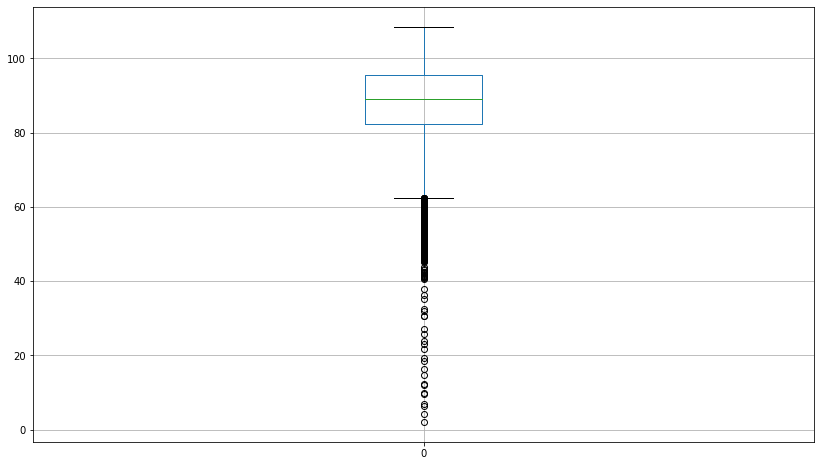

In [ ]:
from pandas import Grouper
from pandas import concat
#series = read_csv( ' daily-minimum-temperatures.csv ' , header=0, index_col=0,
#parse_dates=True, squeeze=True)
one_year = series[ '2013']
groups = one_year.groupby(Grouper(freq='M'))
months= concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
#months.columns = range(1,13)
months.boxplot()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


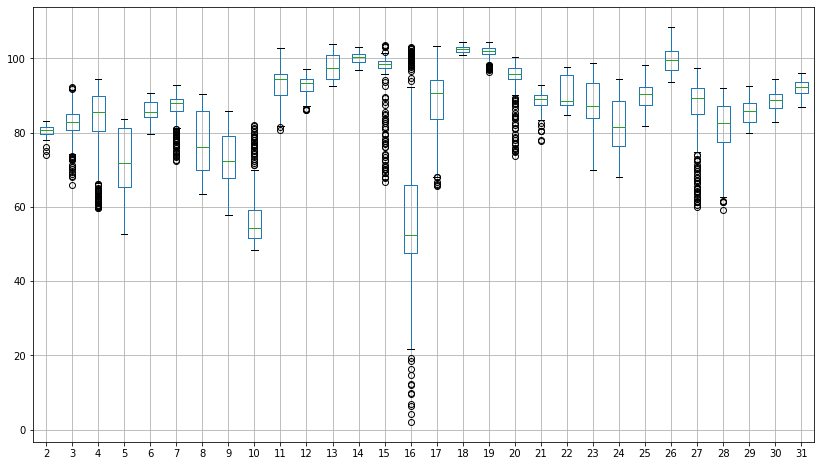

In [ ]:
from pandas import Grouper
from pandas import concat
#series = read_csv( ' daily-minimum-temperatures.csv ' , header=0, index_col=0,
#parse_dates=True, squeeze=True)
one_month = series[ '2013-12']
groups = one_month.groupby(Grouper(freq='D'))
hours= concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
hours = pd.DataFrame(hours)
hours.columns = range(2,32)
hours.boxplot()
plt.show()

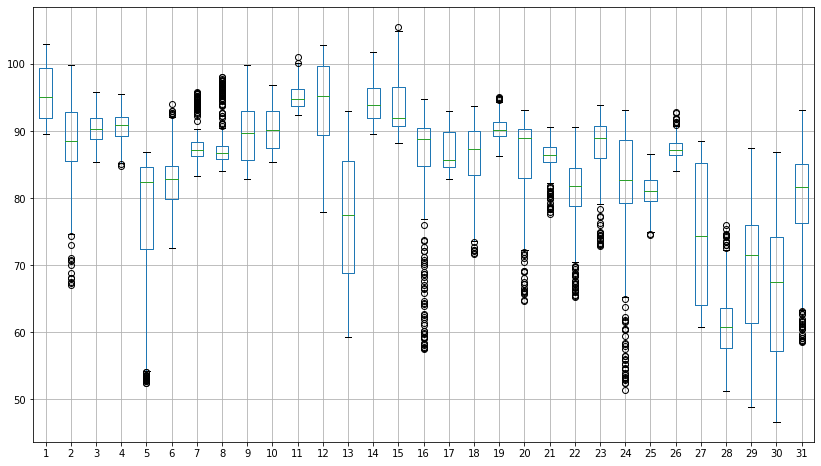

In [ ]:
from pandas import Grouper
from pandas import concat
#series = read_csv( ' daily-minimum-temperatures.csv ' , header=0, index_col=0,
#parse_dates=True, squeeze=True)
one_month = series[ '2014-01']
groups = one_month.groupby(Grouper(freq='D'))
hours= concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
hours = pd.DataFrame(hours)
hours.columns = range(1,32)
hours.boxplot()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


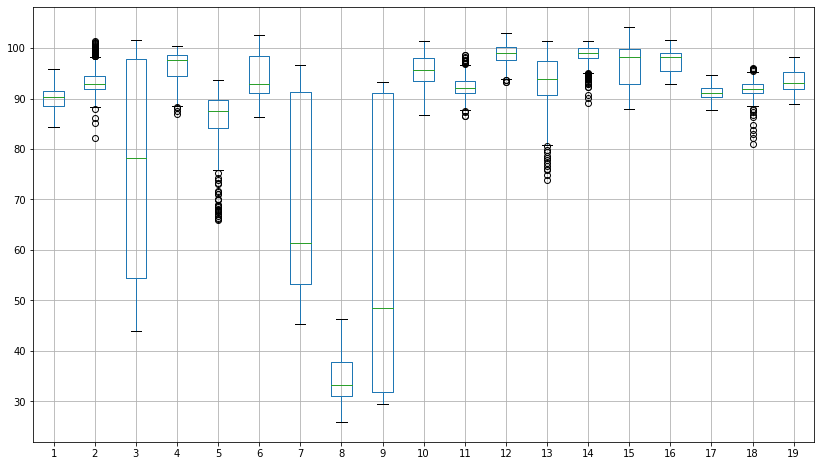

In [ ]:
from pandas import Grouper
from pandas import concat
#series = read_csv( ' daily-minimum-temperatures.csv ' , header=0, index_col=0,
#parse_dates=True, squeeze=True)
one_month = series[ '2014-02']
groups = one_month.groupby(Grouper(freq='D'))
hours= concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
hours = pd.DataFrame(hours)
hours.columns = range(1,20)
hours.boxplot()
plt.show()

Augmented Dickey-Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'].values)
print( ' ADF Statistic: %f ' % result[0])
print( ' p-value: %f ' % result[1])
print( ' Critical Values: ' )
for key, value in result[4].items():
    print( ' \t%s: %.3f ' % (key, value))

 ADF Statistic: -7.368150 
 p-value: 0.000000 
 Critical Values: 
 	1%: -3.431 
 	5%: -2.862 
 	10%: -2.567 


We reject the null hypothesis, therefore we have a stationary time series, it means the series is time-independent.

The lag plot of the series

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


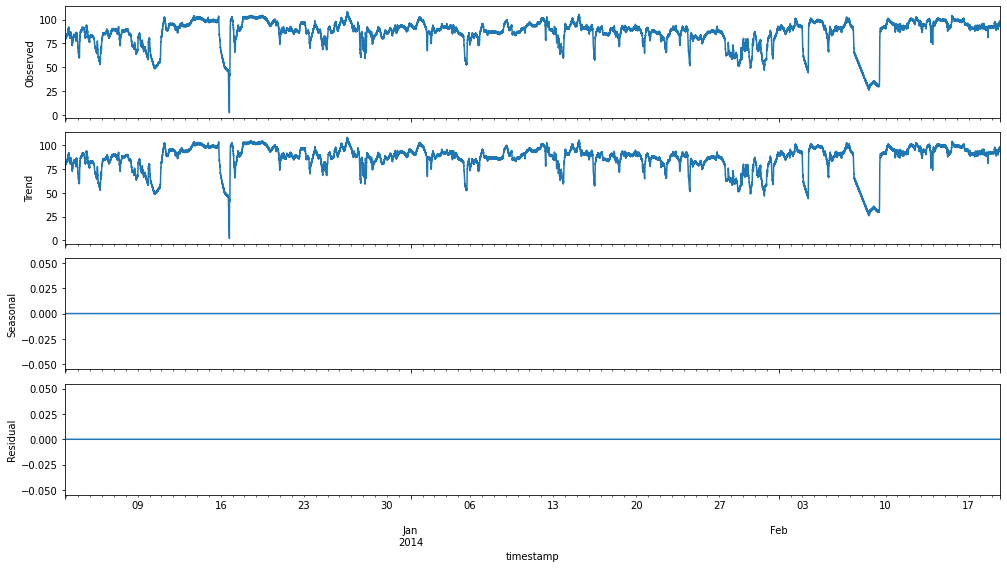

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model= 'additive',freq=1)
result.plot()
plt.show()

Above is shown the decomposition of the series in trend, seasonal and residual

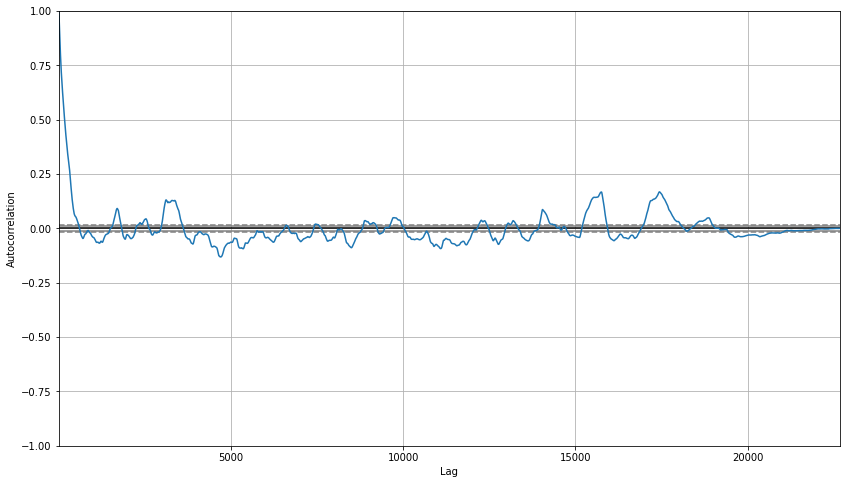

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series.values)

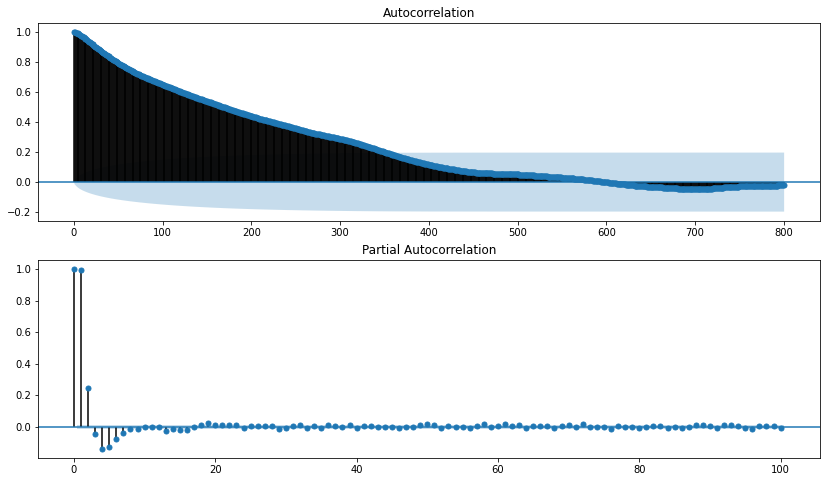

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca(),lags=800)
plt.subplot(212)
plot_pacf(series, ax=plt.gca(),lags=100)
plt.show()

The ACF and PACF plots. This is shown to find the optimum parameters of the ARIMA methods. We can observe that p should be around 400 and q around8. Since p is a very high value the ARIMA method will be computational costly

##Forecast

Next, I switch the runtime type session to GPU

Forecast of one week

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("GPU")
else:
  device = torch.device("cpu")
  print("CPU")  

GPU


In [ ]:
import torch.nn as nn

class RNN(nn.Module):

    def __init__(self,
                 hidden_size,
                 in_size = 1,
                 out_size = 1):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size = in_size,
            hidden_size = hidden_size,
            batch_first = True)
        self.fc = nn.Linear(hidden_size, out_size)

    def forward(self, x, h = None):
        self.rnn.flatten_parameters()
        out, _ = self.rnn(x, h)
        last_hidden_states = out[:, -1]
        out = self.fc(last_hidden_states)
        return out, last_hidden_states

In [ ]:
import os

import pandas as pd
import torch


def sliding_window(ts, features):
    X = []
    Y = []

    for i in range(features + 1, len(ts) + 1):
        X.append(ts[i - (features + 1):i - 1])
        Y.append([ts[i - 1]])

    return X, Y


def get_aep_timeseries():
#    dir_path = os.path.dirname(os.path.realpath(__file__))
    series = pd.read_csv('pump_failure1.csv', header = 0, parse_dates = ['timestamp'],index_col = ['timestamp'])      
    return series.values[-12000:]  




def get_training_datasets(ts, features, test_len):
    X, Y = sliding_window(ts, features)

    X_train, Y_train, X_test, Y_test = X[0:-test_len],\
                                       Y[0:-test_len],\
                                       X[-test_len:],\
                                       Y[-test_len:]

    train_len = round(len(ts) * 0.7)

    X_train, X_val, Y_train, Y_val = X_train[0:train_len],\
                                     X_train[train_len:],\
                                     Y_train[0:train_len],\
                                     Y_train[train_len:]

    x_train = torch.tensor(data = X_train).float()
    y_train = torch.tensor(data = Y_train).float()

    x_val = torch.tensor(data = X_val).float()
    y_val = torch.tensor(data = Y_val).float()

    x_test = torch.tensor(data = X_test).float()
    y_test = torch.tensor(data = Y_test).float()

    return x_train, x_val, x_test,\
           y_train.squeeze(1), y_val.squeeze(1), y_test.squeeze(1)

In [ ]:
import copy
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import MinMaxScaler


In [ ]:
random.seed(1)
torch.manual_seed(1)

# PARAMETERS

# length of sliding window
features = 240
# length of test dataset
test_ts_len = 2016
# size of RNN hidden state
rnn_hidden_size = 24
# Optimizer learning rate
learning_rate = 0.02

training_epochs = 500

# Preparing datasets for Training
ts = get_aep_timeseries()
scaler = MinMaxScaler()
scaled_ts = scaler.fit_transform(ts)
x_train, x_val, x_test, y_train, y_val, y_test =\
    get_training_datasets(scaled_ts, features, test_ts_len)

x_train=x_train.to(device) 
x_val  =x_val.to(device)
x_test =x_test.to(device)
y_train=y_train.to(device) 
y_val  =y_val.to(device)
y_test =y_test.to(device)  

# Initializing the model
model = RNN(hidden_size = rnn_hidden_size)
model.to(device)
model.train()

# Training
optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
mse_loss = torch.nn.MSELoss()

best_model = None
min_val_loss = sys.maxsize

training_loss = []
validation_loss = []

for t in range(training_epochs):

    prediction, _ = model(x_train)
    loss = mse_loss(prediction, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    val_prediction, _ = model(x_val)
    val_loss = mse_loss(val_prediction, y_val)

    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())

    if val_loss.item() < min_val_loss:
        best_model = copy.deepcopy(model)
        min_val_loss = val_loss.item()

    if t % 50 == 0:
        print(f'epoch {t}: train - {round(loss.item(), 4)}, '
              f'val: - {round(val_loss.item(), 4)}')

best_model.eval()
_, h_list = best_model(x_val)
# warm hidden state
h = (h_list[-1, :]).unsqueeze(-2)

epoch 0: train - 0.948, val: - 0.2178
epoch 50: train - 0.0416, val: - 0.0145
epoch 100: train - 0.0014, val: - 0.0055
epoch 150: train - 0.0002, val: - 0.0045
epoch 200: train - 0.0002, val: - 0.0003
epoch 250: train - 0.0002, val: - 0.0002
epoch 300: train - 0.0002, val: - 0.0002
epoch 350: train - 0.0002, val: - 0.0002
epoch 400: train - 0.0002, val: - 0.0002
epoch 450: train - 0.0002, val: - 0.0002


In [ ]:
predicted = []
for test_seq in x_test.tolist():
    x = torch.Tensor(data = [test_seq]).to(device)
    # passing hidden state through each iteration
    y, h = best_model(x, h.unsqueeze(-2))
    unscaled = scaler.inverse_transform(np.array(y.item()).reshape(-1, 1))[0][0]
    predicted.append(unscaled)

real = scaler.inverse_transform(y_test.tolist())

In [ ]:
plt.rcParams["figure.figsize"] = [14,8]

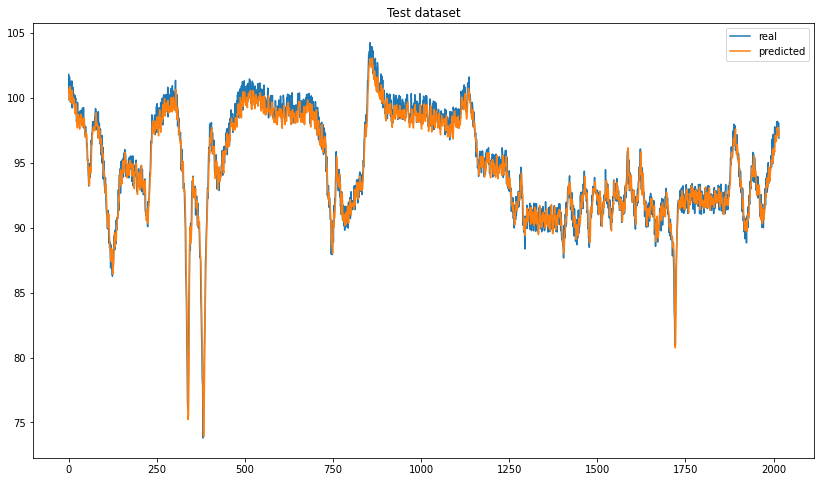

In [ ]:
plt.figure()
plt.title("Test dataset")
plt.plot(real, label = 'real')
plt.plot(predicted, label = 'predicted')
plt.legend()
plt.show()

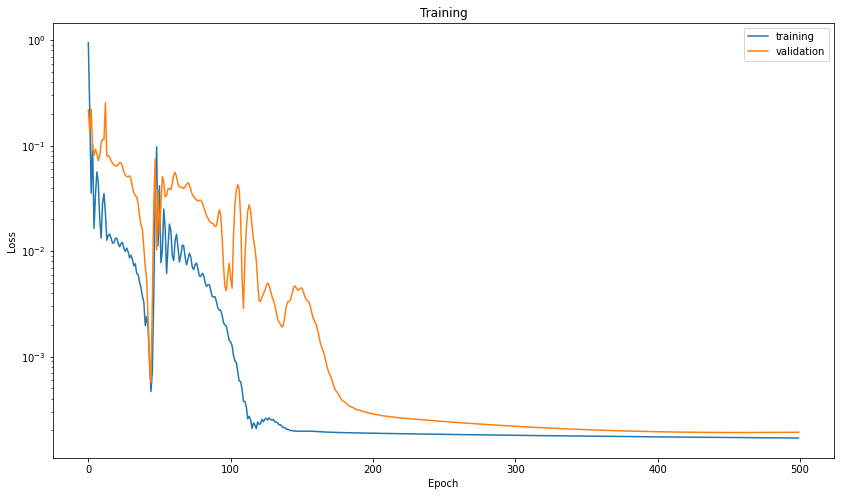

In [ ]:
plt.figure()
plt.title('Training')
plt.yscale('log')
plt.plot(training_loss, label = 'training')
plt.plot(validation_loss, label = 'validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Using LSTM

In [ ]:
import torch.nn as nn

class LSTM(nn.Module):

    def __init__(self,
                 hidden_size,
                 in_size = 1,
                 out_size = 1):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size = in_size,
            hidden_size = hidden_size,
            batch_first = True)
        self.fc = nn.Linear(hidden_size, out_size)

    def forward(self, x, h = None):
        self.lstm.flatten_parameters()
        out, h = self.lstm(x, h)
        last_hidden_states = out[:, -1]
        out = self.fc(last_hidden_states)
        return out, h

In [ ]:
import os

import pandas as pd
import torch


def sliding_window(ts, features):
    X = []
    Y = []

    for i in range(features + 1, len(ts) + 1):
        X.append(ts[i - (features + 1):i - 1])
        Y.append([ts[i - 1]])

    return X, Y


def get_aep_timeseries():
#    dir_path = os.path.dirname(os.path.realpath(__file__))
    series = pd.read_csv('pump_failure1.csv', header = 0, parse_dates = ['timestamp'],index_col = ['timestamp'])     
    return series.values[-12000:]


def get_pjme_timeseries():
    dir_path = os.path.dirname(os.path.realpath(__file__))
    df = pd.read_csv(f'{dir_path}/data/PJME_hourly.csv')
    ts = df['PJME_MW'].astype(int).values.reshape(-1, 1)[-3000:]
    return ts


def get_ni_timeseries():
    dir_path = os.path.dirname(os.path.realpath(__file__))
    df = pd.read_csv(f'{dir_path}/data/NI_hourly.csv')
    ts = df['NI_MW'].astype(int).values.reshape(-1, 1)[-3000:]
    return ts


def get_training_datasets(ts, features, test_len):
    X, Y = sliding_window(ts, features)

    X_train, Y_train, X_test, Y_test = X[0:-test_len],\
                                       Y[0:-test_len],\
                                       X[-test_len:],\
                                       Y[-test_len:]

    train_len = round(len(ts) * 0.7)

    X_train, X_val, Y_train, Y_val = X_train[0:train_len],\
                                     X_train[train_len:],\
                                     Y_train[0:train_len],\
                                     Y_train[train_len:]

    x_train = torch.tensor(data = X_train).float()
    y_train = torch.tensor(data = Y_train).float()

    x_val = torch.tensor(data = X_val).float()
    y_val = torch.tensor(data = Y_val).float()

    x_test = torch.tensor(data = X_test).float()
    y_test = torch.tensor(data = Y_test).float()

    return x_train, x_val, x_test,\
           y_train.squeeze(1), y_val.squeeze(1), y_test.squeeze(1)

In [ ]:
import copy
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import MinMaxScaler

In [ ]:
random.seed(23)
torch.manual_seed(23)

# PARAMETERS

# length of sliding window
features = 240
# length of test dataset
test_ts_len = 2016
# size of LSTM hidden state
lstm_hidden_size = 24
# Optimizer learning rate
learning_rate = 0.02

training_epochs = 500

# Preparing datasets for Training
ts = get_aep_timeseries()
scaler = MinMaxScaler()
scaled_ts = scaler.fit_transform(ts)
x_train, x_val, x_test, y_train, y_val, y_test =\
    get_training_datasets(scaled_ts, features, test_ts_len)


x_train=x_train.to(device) 
x_val  =x_val.to(device)
x_test =x_test.to(device)
y_train=y_train.to(device) 
y_val  =y_val.to(device)
y_test =y_test.to(device)     

# Initializing the model
model = LSTM(hidden_size = lstm_hidden_size)
model.to(device)
model.train()

# Training
optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
mse_loss = torch.nn.MSELoss()

best_model = None
min_val_loss = sys.maxsize

training_loss = []
validation_loss = []

for t in range(training_epochs):

    prediction, _ = model(x_train)
    loss = mse_loss(prediction, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    val_prediction, _ = model(x_val)
    val_loss = mse_loss(val_prediction, y_val)

    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())

    if val_loss.item() < min_val_loss:
        best_model = copy.deepcopy(model)
        min_val_loss = val_loss.item()

    if t % 10 == 0:
        print(f'epoch {t}: train - {round(loss.item(), 4)}, '
              f'val: - {round(val_loss.item(), 4)}')


epoch 0: train - 0.4402, val: - 0.2276
epoch 10: train - 0.0472, val: - 0.1038
epoch 20: train - 0.0248, val: - 0.121
epoch 30: train - 0.0197, val: - 0.0982
epoch 40: train - 0.017, val: - 0.1032
epoch 50: train - 0.0153, val: - 0.0889
epoch 60: train - 0.0137, val: - 0.0836
epoch 70: train - 0.0118, val: - 0.0703
epoch 80: train - 0.0094, val: - 0.0567
epoch 90: train - 0.006, val: - 0.0365
epoch 100: train - 0.0011, val: - 0.0082
epoch 110: train - 0.0008, val: - 0.0024
epoch 120: train - 0.0005, val: - 0.0072
epoch 130: train - 0.0003, val: - 0.0039
epoch 140: train - 0.0003, val: - 0.0034
epoch 150: train - 0.0003, val: - 0.0042
epoch 160: train - 0.0003, val: - 0.0034
epoch 170: train - 0.0003, val: - 0.0032
epoch 180: train - 0.0003, val: - 0.0033
epoch 190: train - 0.0003, val: - 0.003
epoch 200: train - 0.0003, val: - 0.0029
epoch 210: train - 0.0003, val: - 0.0028
epoch 220: train - 0.0003, val: - 0.0027
epoch 230: train - 0.0003, val: - 0.0026
epoch 240: train - 0.0003, val:

In [ ]:
best_model.eval()
with torch.no_grad():
    _, h_list = best_model(x_val)
    # warm hidden and cell state
    h = tuple([(h[-1, -1, :]).unsqueeze(-2).unsqueeze(-2)
               for h in h_list])

    predicted = []
    for test_seq in x_test.tolist():
        x = torch.Tensor(data = [test_seq]).to(device)
        # passing hidden state and cell through each iteration
        y, h = best_model(x, h)
        unscaled = scaler.inverse_transform(
            np.array(y.item()).reshape(-1, 1))[0][0]
        predicted.append(unscaled)

real = scaler.inverse_transform(y_test.tolist())

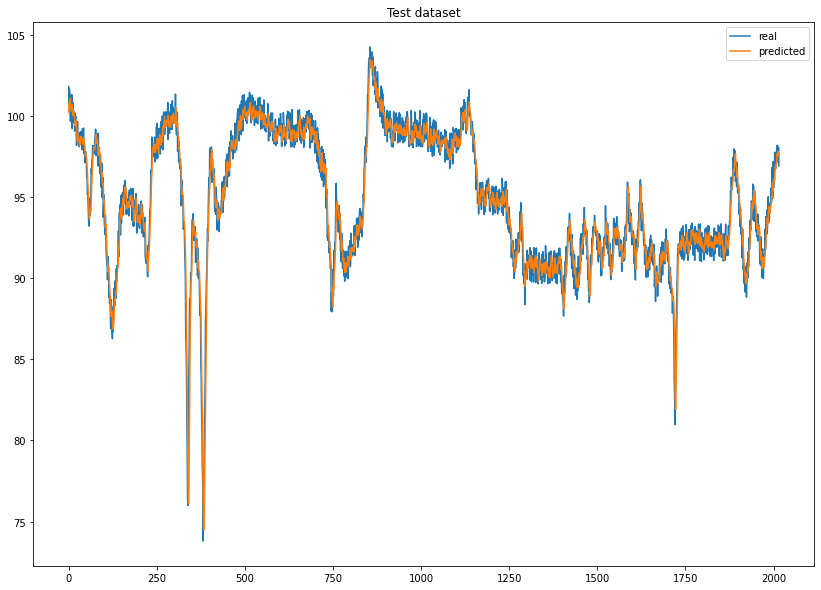

In [ ]:
plt.rcParams["figure.figsize"] = [14,10]
plt.title("Test dataset")
plt.plot(real, label = 'real')
plt.plot(predicted, label = 'predicted')
plt.legend()
plt.show()

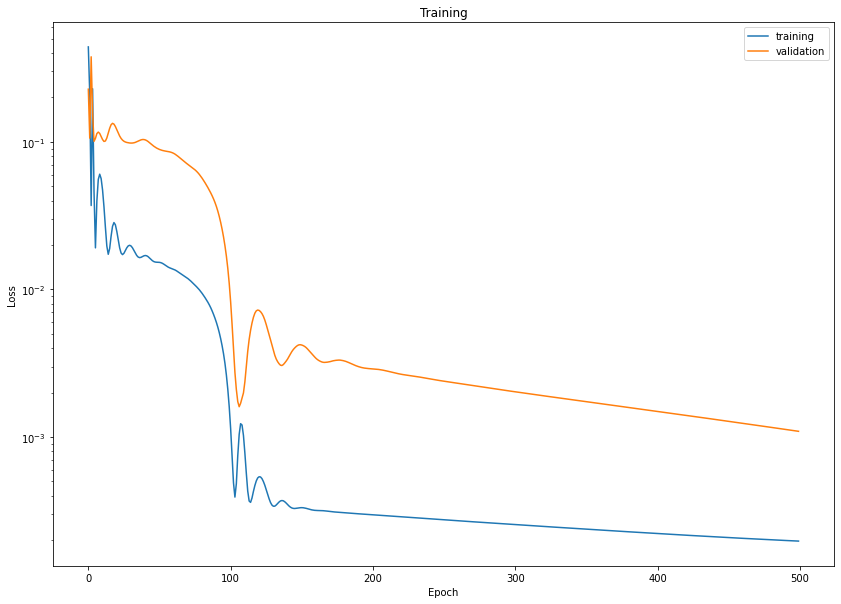

In [ ]:
plt.title('Training')
plt.yscale('log')
plt.plot(training_loss, label = 'training')
plt.plot(validation_loss, label = 'validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

DeepAR

To use DeepAR I will install gluonts

Because I am running out of time, I have stopped the cell on this notebook. I will display the results only. The result can be seen on the pdf file

In [ ]:
ls -l /usr/local | grep cuda

lrwxrwxrwx  1 root root   22 Dec 23 14:25 cuda -> /etc/alternatives/cuda/
drwxr-xr-x 16 root root 4096 Dec 23 14:17 cuda-10.0/
drwxr-xr-x 15 root root 4096 Dec 23 14:20 cuda-10.1/
lrwxrwxrwx  1 root root   25 Dec 23 14:25 cuda-11 -> /etc/alternatives/cuda-11/
drwxr-xr-x 15 root root 4096 Dec 23 14:22 cuda-11.0/
drwxr-xr-x  1 root root 4096 Dec 23 14:24 cuda-11.1/


In [ ]:
pip install --upgrade mxnet-cu101 gluonts

     |████████████████████████████████| 358.1 MB 5.0 kB/s 
     |████████████████████████████████| 2.1 MB 11.2 MB/s 
     |████████████████████████████████| 10.9 MB 32.8 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
from mxnet import nd, gpu, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
df = pd.read_csv('pump_failure1.csv', index_col=0)

In [ ]:
from gluonts.dataset.common import ListDataset
X_train = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2014-02-04 00:00:00"]}],
    freq = "5min"
)

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [ ]:
import mxnet as mx
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=1200, 
                            trainer=Trainer(ctx=mx.context.gpu(), epochs=20 ) )
#estimator.load_parameters('net.params', ctx=gpu(0))
predictor = estimator.train(training_data=X_train)

100%|██████████| 50/50 [01:52<00:00,  2.25s/it, epoch=20/20, avg_epoch_loss=1.78]


In [ ]:
from gluonts.dataset.common import ListDataset
X_test = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2014-02-04 00:00:00"]}],
    freq = "5min"
)

In [ ]:
plt.rcParams["figure.figsize"] = [12,8]

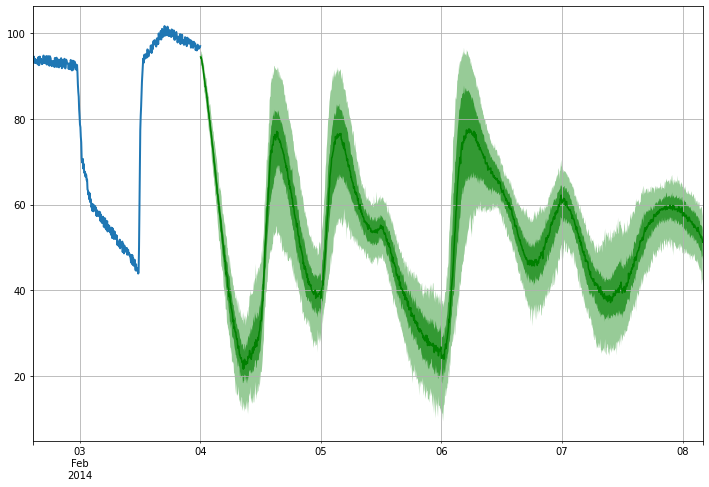

In [ ]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(X_train, predictor.predict(X_test)):
    to_pandas(test_entry)[-400:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50, 90.0])
plt.grid(which='both')

ARIMA

We can use ARIMA from the darts package. As I already mentioned, we have to set p>=400 and q=9. This results on huge RAM consumption and compuation time. Below is the result from using default p,q values which for p is very low.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
series = pd.read_csv('pump_failure1.csv', header=0, index_col=0, parse_dates=True,squeeze=True)

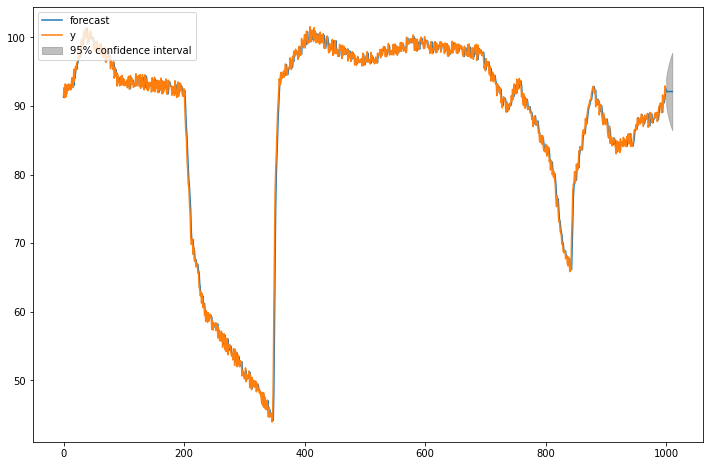

In [ ]:
# plot the confidence intervals for an ARIMA forecast
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
# load data

plt.rcParams["figure.figsize"] = [12,8]

# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 4000
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit(disp=True)
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-1000, len(train)+10)
plt.legend(loc='upper left')
plt.show()

Or we can use the darts package. This part is at the end of this notebook since it requirest a specfic matplotlib version.

Next, I switch the runtime type session to CPU


## Finding Anomalies

Change point detection

In [ ]:
pip install ruptures

     |████████████████████████████████| 918 kB 5.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
df = pd.read_csv('pump_failure1.csv', index_col=0)

In [ ]:
plt.rcParams["figure.figsize"] = [12,8]

(<Figure size 864x576 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7fd36cfde810>])

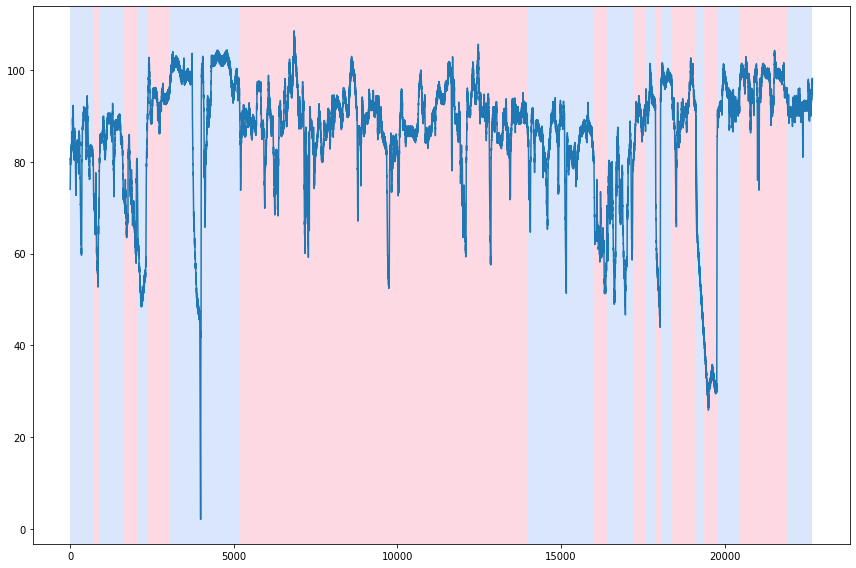

In [ ]:
import ruptures as rpt
# "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model="rbf").fit(df["value"].values)
my_bkps = algo.predict(n_bkps=20)

# show results
rpt.show.display(df["value"], my_bkps, figsize=(12, 8))

From the above figure, we can obserbe several failures and the last one (the right one) as a catastrofic 

Here, I use the sesd package 

In [ ]:
pip install sesd

  Created wheel for sesd: filename=sesd-0.2-py3-none-any.whl size=4711 sha256=8a7b7e878e2de6ab6c142759567edfccdf6c402769725788923c8cc1c8d98860
  Stored in directory: /root/.cache/pip/wheels/8b/a1/14/6894ba655341cdb775fccfec9e992ebd606de44566fe6af906
Successfully built sesd


One has to installed the statsmodels from github link

In [ ]:
pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-1st70gpl
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-1st70gpl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.0.dev0+171.g66ade02bb-cp37-cp37m-linux_x86_64.whl size=17880926 sha256=2f048692769c116b1b1f3eb6cd46c1231c6bff254a9ce4e0baf122bf2e2fafb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-3f58dpdr/wheels/5c/ab/d8/d9505a18dd992621edd24cfddb9a1bd694dee85c065c0a6e57
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('pump_failure1.csv')

Around 10% is expected to find of outliers. Therefore, I have selected max_anomalies=2000

In [ ]:
import sesd

outliers_indices = sesd.seasonal_esd(df['value'], periodicity=288, hybrid=True, max_anomalies=2000)

In [ ]:
a = df.loc[outliers_indices, ['value']] #anomaly

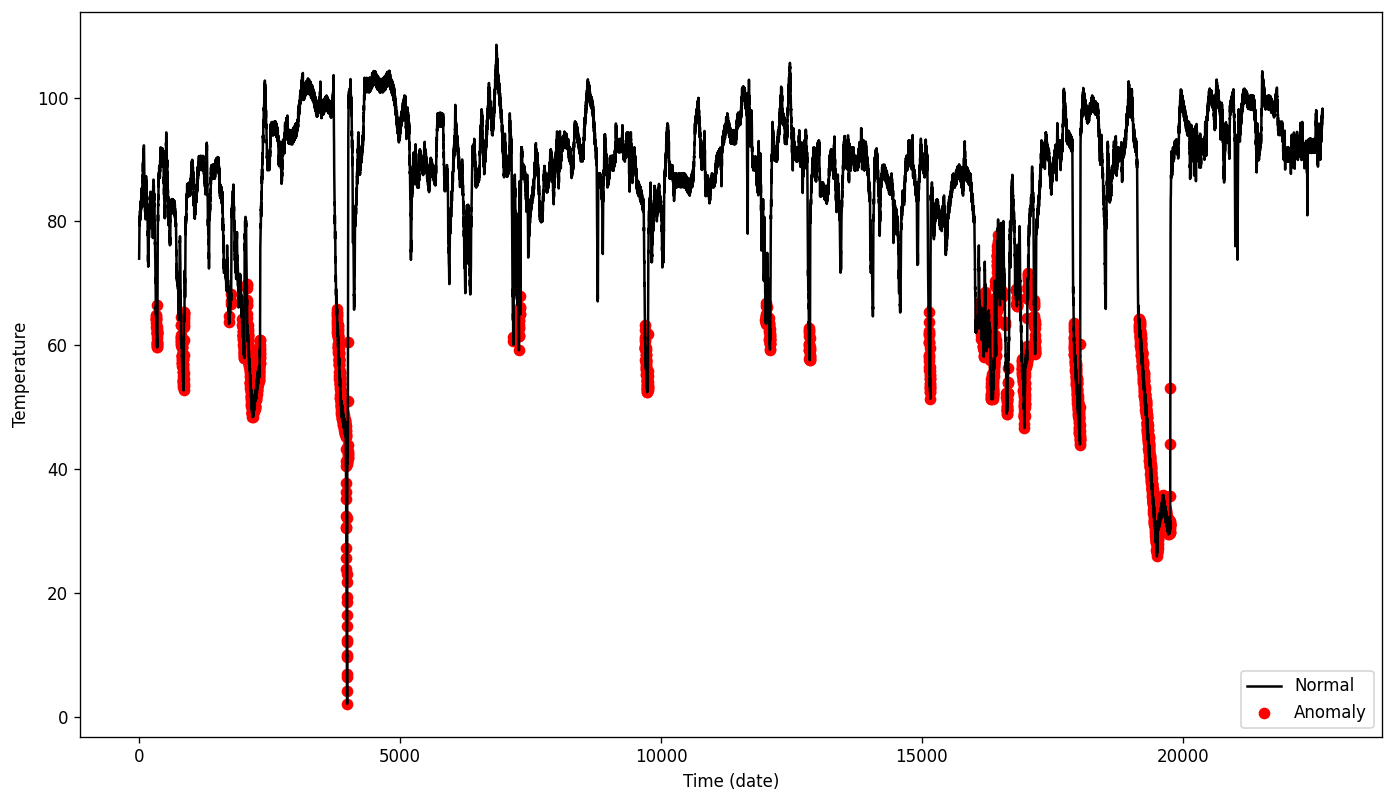

In [ ]:
import matplotlib.ticker as mticker


#myLocator = mticker.MultipleLocator(4400)

fig, ax= plt.subplots(figsize=(14, 8),dpi=120)

ax.plot(df.index, df['value'], color='black', label = 'Normal')
ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
ax.set_xlabel('Time (date)')  # Add an x-label to the axes.
ax.set_ylabel('Temperature')  # Add an x-label to the axes.
#ax.xaxis.set_major_locator(myLocator)

ax.legend(loc="lower right")  # Add a legend.
#plt.savefig('Anomaly(1%).eps')

## Failure Prediction 

Here, I have used the pyod package

I have used the models Autoencoder, LODA, ECOD and COPOD. It seems they perform better than the rest. They perform similar between them. I have assumed 10% of outliers. 

In [ ]:
pip install pyod

     |████████████████████████████████| 114 kB 4.3 MB/s 
  Created wheel for pyod: filename=pyod-0.9.7-py3-none-any.whl size=136277 sha256=0ad9c001d8dcc68668729c2aae9095d0a74e05335dd00dbfc2aeacdc5fba03ec
  Stored in directory: /root/.cache/pip/wheels/ce/14/ae/60cbb36511e59bc12f8f0883805f586db3b315972b54865d33
Successfully built pyod


In [ ]:
pip install --upgrade pyod

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# load data
df = pd.read_csv('pump_failure1.csv', index_col=0)

In [ ]:
x_train, x_test = df[:-4500], df[-4500:]

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train["value"].values.reshape(-1, 1))
X_test  = scaler.fit_transform(x_test["value"].values.reshape(-1, 1))

In [ ]:
# train the AutoEncoder detector
from pyod.models.auto_encoder import AutoEncoder
model = AutoEncoder(hidden_neurons=[1])
model.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[1], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fad178d0dd0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [ ]:
# get outlier scores
y_train_scores = model.decision_scores_  # raw outlier scores on the train data
y_test_scores  = model.decision_function(X_test)  # predict raw outlier scores on test

In [ ]:
# get the prediction label and outlier scores of the training data
y_train_pred   = model.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = model.decision_scores_  # raw outlier scores

In [ ]:
# get the prediction on the test data
y_test_pred   = model.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = model.decision_function(X_test)  # outlier scores

On train data:

In [ ]:
a = df[:-4500].loc[y_train_pred==1, ['value']] #anomaly

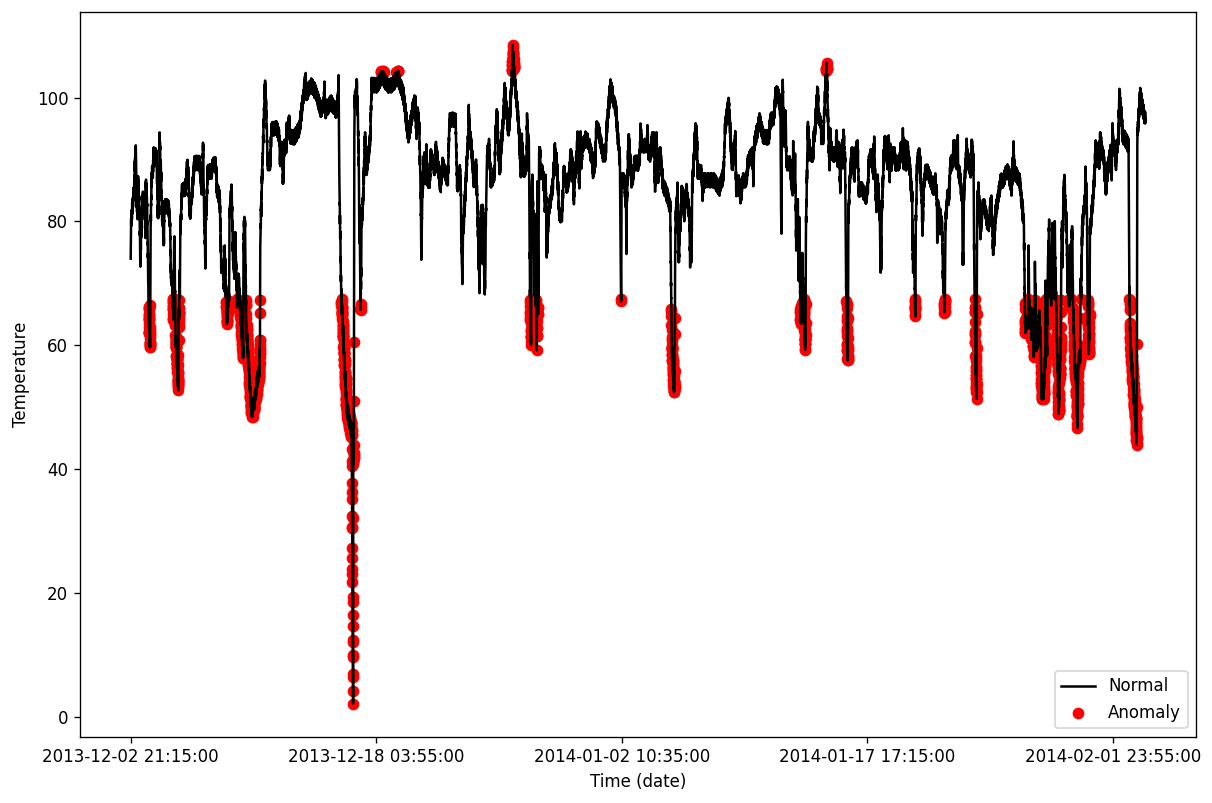

In [ ]:
import matplotlib.ticker as mticker

#time_fmt = 'YYYY- MM-DD' # how you want to display time/date
myLocator = mticker.MultipleLocator(4400)

fig, ax= plt.subplots(figsize=(12, 8),dpi=120)

ax.plot(df.index[:-4500], df['value'][:-4500], color='black', label = 'Normal')
ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
ax.set_xlabel('Time (date)')  # Add an x-label to the axes.
ax.set_ylabel('Temperature')  # Add an x-label to the axes.
#ax.xaxis.set_major_formatter(mdates.DateFormatter(time_fmt))
ax.xaxis.set_major_locator(myLocator)
ax.legend(loc="lower right")  # Add a legend.
#plt.savefig('Anomaly.eps')

On test data:

In [ ]:
a = df[-4500:].loc[y_test_pred==1, ['value']] #anomaly

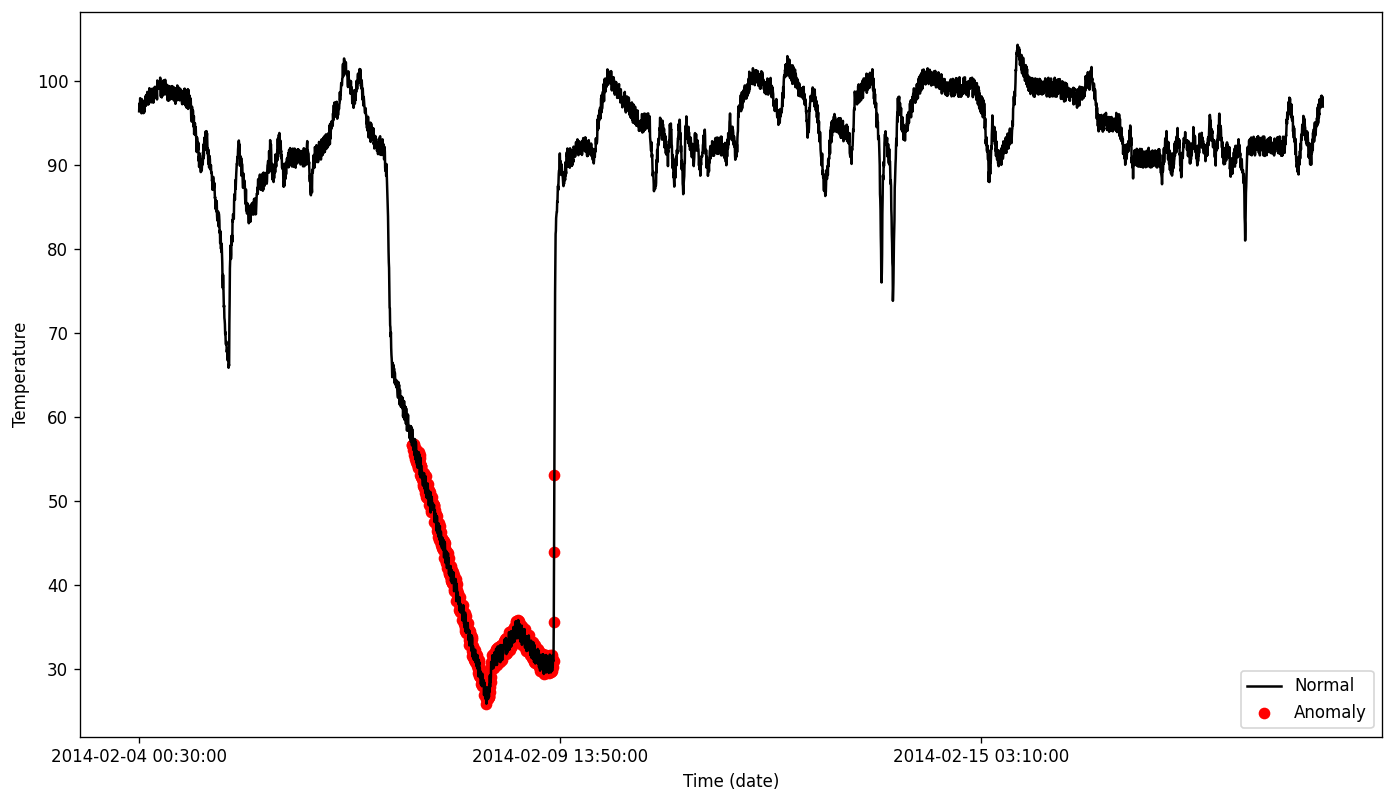

In [ ]:
import matplotlib.ticker as mticker


myLocator = mticker.MultipleLocator(1600)

fig, ax= plt.subplots(figsize=(14, 8),dpi=120)

ax.plot(df.index[-4500:], df['value'][-4500:], color='black', label = 'Normal')
ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
ax.set_xlabel('Time (date)')  # Add an x-label to the axes.
ax.set_ylabel('Temperature')  # Add an x-label to the axes.
ax.xaxis.set_major_locator(myLocator)

ax.legend(loc="lower right")  # Add a legend.
#plt.savefig('Anomaly.eps')

Now ECOD

In [ ]:
# train the COPOD detector
from pyod.models.ecod import ECOD
model = ECOD()
model.fit(X_train)

ECOD(contamination=0.1, n_jobs=1)

In [ ]:
# get the prediction label and outlier scores of the training data
y_train_pred = model.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = model.decision_scores_  # raw outlier scores

In [ ]:
# get the prediction on the test data
y_test_pred   = model.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = model.decision_function(X_test)  # outlier scores

In [ ]:
a = df[:-4500].loc[y_train_pred==1, ['value']] #anomaly

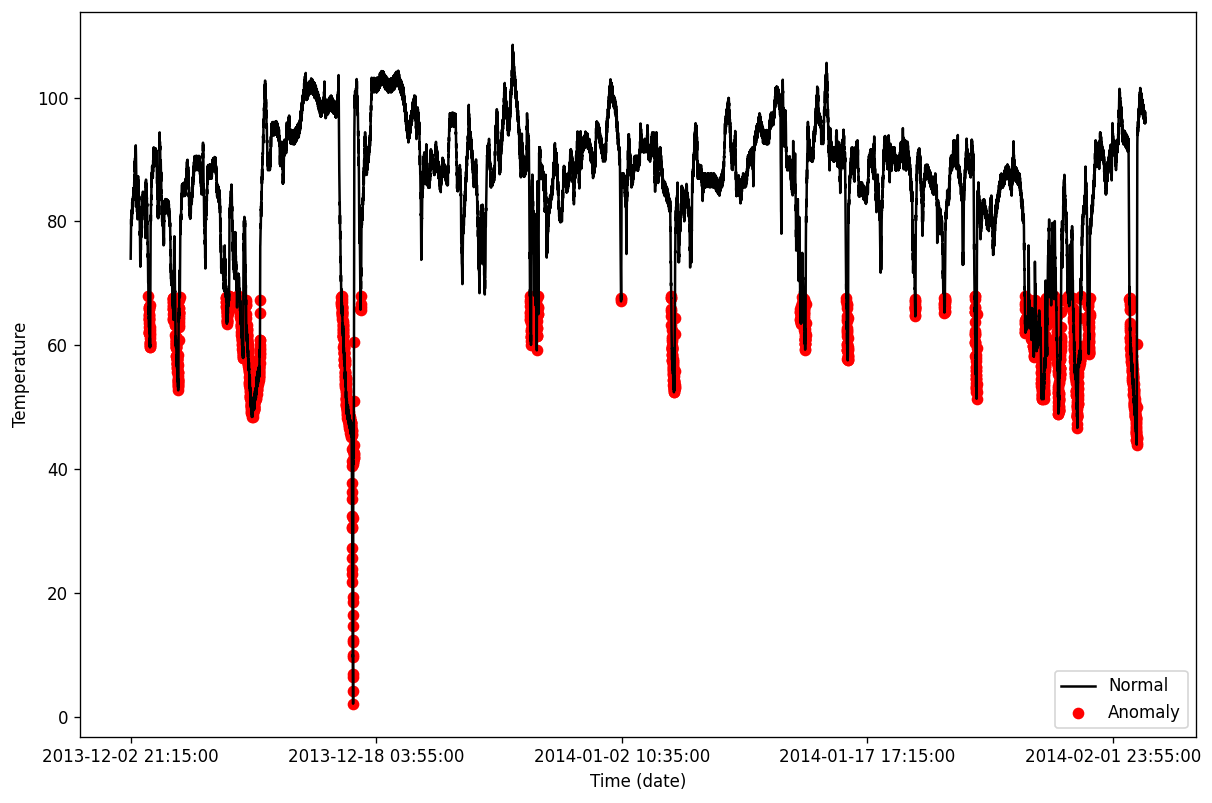

In [ ]:
import matplotlib.ticker as mticker

#time_fmt = 'YYYY- MM-DD' # how you want to display time/date
myLocator = mticker.MultipleLocator(4400)

fig, ax= plt.subplots(figsize=(12, 8),dpi=120)

ax.plot(df.index[:-4500], df['value'][:-4500], color='black', label = 'Normal')
ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
ax.set_xlabel('Time (date)')  # Add an x-label to the axes.
ax.set_ylabel('Temperature')  # Add an x-label to the axes.
#ax.xaxis.set_major_formatter(mdates.DateFormatter(time_fmt))
ax.xaxis.set_major_locator(myLocator)
ax.legend(loc="lower right")  # Add a legend.
#plt.savefig('Anomaly.eps')

In [ ]:
a = df[-4500:].loc[y_test_pred==1, ['value']] #anomaly

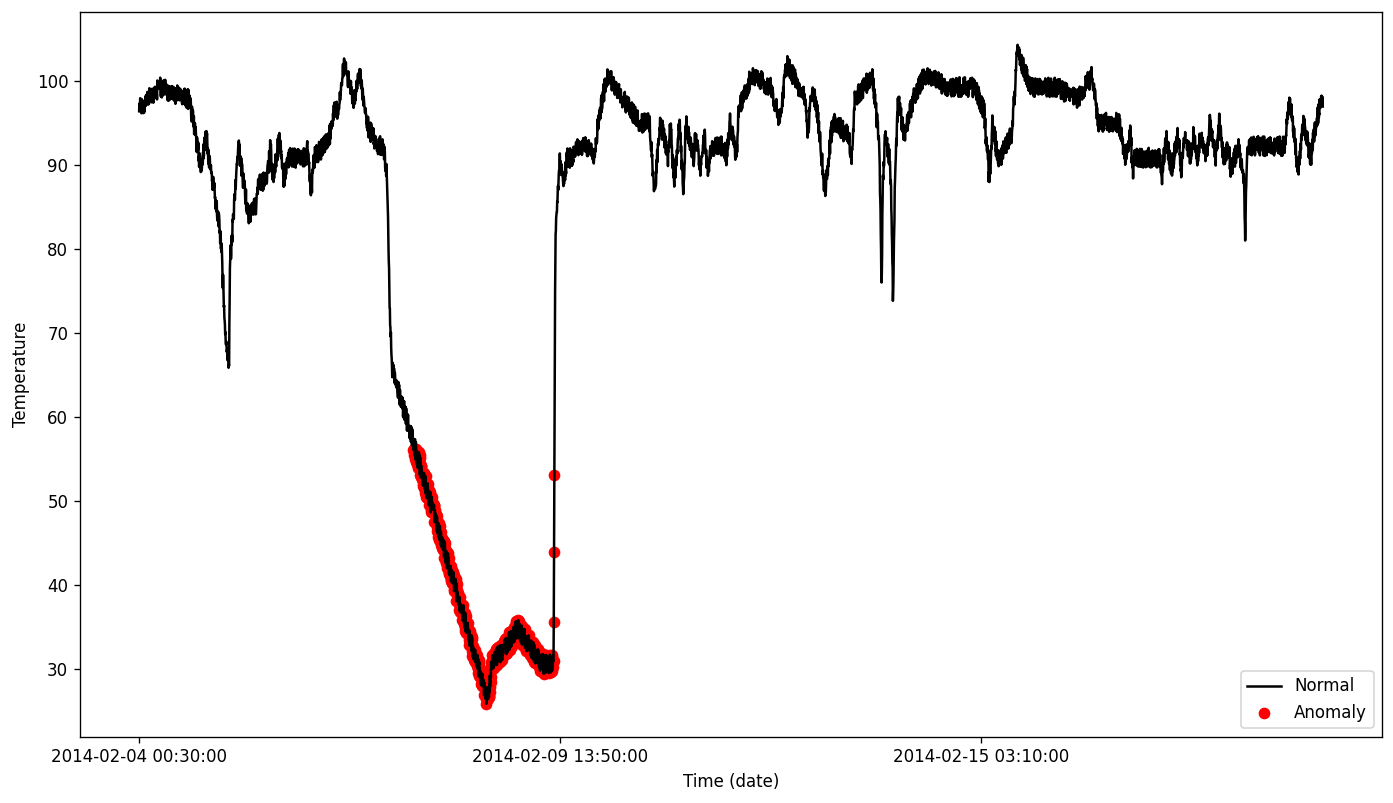

In [ ]:
import matplotlib.ticker as mticker


myLocator = mticker.MultipleLocator(1600)

fig, ax= plt.subplots(figsize=(14, 8),dpi=120)

ax.plot(df.index[-4500:], df['value'][-4500:], color='black', label = 'Normal')
ax.scatter(a.index,a['value'], color='red', label = 'Anomaly')
ax.set_xlabel('Time (date)')  # Add an x-label to the axes.
ax.set_ylabel('Temperature')  # Add an x-label to the axes.
ax.xaxis.set_major_locator(myLocator)

ax.legend(loc="lower right")  # Add a legend.
#plt.savefig('Anomaly.eps')

Having the true labels, we could obtain the accurary of these models and visualize them.

In [ ]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

In [ ]:
from pyod.utils.example import visualize 
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=True)

Appendix

ARIMA using darts

In [ ]:
pip install darts

In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.15.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

df = pd.read_csv("pump_failure1.csv")

In [ ]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(df, 'timestamp', 'value',freq='5T')

In [ ]:
# Set aside the last 4400 months as a validation series
train, val = series[:-4400], series[-4400:]

In [ ]:
from darts.models import ARIMA

model = ARIMA()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

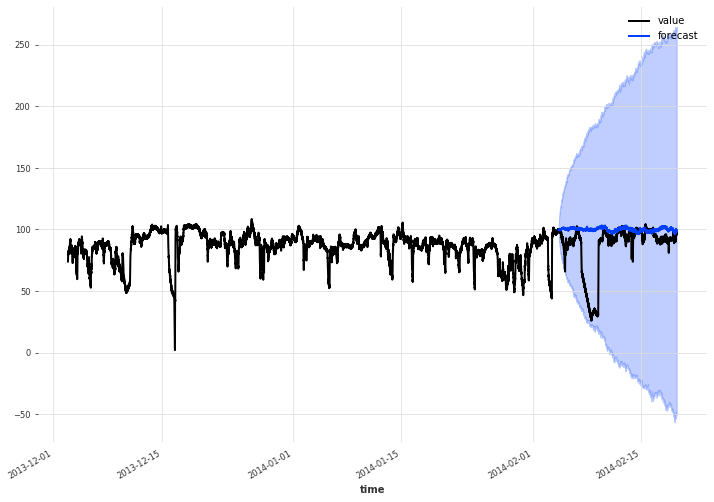

In [ ]:
plt.rcParams["figure.figsize"] = [12,8]
plt.figure()
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()